https://ashhyun.github.io/kaggle/Titanic_1/
위의 주소를 참고하여 공부하면 좋을 듯함

- KNN : 근접한 데이터 k개를 새로운 데이터 클래스로 분류
- SVM : 데이터를 2개의 영역으로 분류하는 이진 분류기(선형, 비선형 분류 가능함)

딥러닝 이전에 가장 잘 나가던 알고리즘은 SVM임

잘모르면 svm, 랜덤 포레스트를 쓰라는 말이 있을 정도로 성능이 좋았음.
- 의사결정 트리(decision tree): 이진 트리를 활용하여 관측값과 목표값을 연결하는 예측 모델.

선은 엣지(edge), 동그라미는 노드(node)라고 함. 시작 node는 root node, 마지막 노드는 leaf node라고 함.

스무고개와 같은 방식의 선택 방법으로 진행
- 랜덤포레스트 : 다수의 의사결정 트리를 만들고 각각의 결과를 취합하여 최종 분류를 선택함
- 나이브베이즈 분류(Naive bayes Classifier) : a와b가 동시에 일어날 확률/b가 일어날 사건확률
- Kmeans(비지도) : K개의 데이터 그룹으로 묶음
- 선형회귀 : 직선을 통해 분류하는 알고리즘. 각 점에서 회귀 직선까지의 y축방향 거리 제곱의 총합을 최소로 얻어지는 직선임.

수식은 $y = wx + b$
- 로지스틱 회귀 :
  - sigmoid가 있는데 1/1+e^-wx+b를 계산하여 0.5를 기준으로 미만일 경우 0, 이상일 경우 1임

KNN의 K값은 홀수값으로 주는 것이 관례임. 왜냐면 짝수일 경우 동점이 생기는 경우도 있기 때문임. 물론 모델 설계에 따라 동점이어도 어느쪽에 우선권을 줄지는 다름. 보통은 동점일 경우 첫번째 분류 데이터로 설정될 것임.
거리를 구하는 것은 피타고라스의 정리를 이용하여 구할 수 있음(2차원의 경우는...)
차원이 늘어나면 피타고라스 정리가 안됨. 이럴 경우 다차원으로 사용이 가능한 유클리드 거리를 이용하여 구하게 됨
열이 3점, 블로킹, 포지션 이렇게 3개가 있을 때, 농구에서 3점슛을 5번, 블로킹이 0번인 선수의 포지션을 예측한다면? 현재 타겟 열을 제외하면 2차원 데이터임.
KNN은 이진, 다중 분류가 모두 가능하고 다중분류에도 탁월한 성능을 보임.
KNN에서 K값이 작으면 과적합, 크면 과소적합이 될 확률이 높음
그럼 어느정도의 숫자를 주는 것이 좋은가?(내 경험은 5,7정도가 좋긴 했음)
- 결국엔 전부 확인해서 비교하는 방법밖엔 없음
- 즉 K의 값의 기준은 없음
- 다른 의견으로 다수결의 %가 높은 k값을 말했음(수강생 의견)
예시로 '나'라는 사람을 어떤 사람인지 판단하기 위해서 절친 1명만 볼때, 전화번호부에 있는 모든 사람을 볼때와는 다르다고 볼 수 있음.

유클리드 거리로 계산하면 부족한 요소도 있음

추천영화시스템으로 A(기본) = (20,0) B(사랑) = (0,20) C(돈) = (100, 0) 이렇게 있을 때 거리로 따지면 B라는 것과 연결 짓겠지만 분류로는 C에 가까움. 이러면 유클리드 거리를 쓰는 것이 틀린 방법이 됨.

이에 따라 cos(코사인)유사도 방식으로 구하는 방법을 적용

cos0도 = 1, 90도 = 0, 180도 = -1 

하지만 적용할 땐 0~90도까지만 보기때문에 0~1까지만 값이 나올 수 있음

# 전날 숙제에 관한 풀이

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [405]:
train = pd.read_csv('titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [406]:
print(train.shape)
train.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [407]:
test = pd.read_csv('titanic/test.csv')
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [408]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [409]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [410]:
survived = train[train['Survived'] == 1]['Sex'].value_counts()
dead = train[train['Survived'] == 0]['Sex'].value_counts()
df = pd.DataFrame([survived, dead])
# print(survived)
# print(dead)
df.index = ['Survived', 'Dead']
df

,female,male
Survived,233,109
Dead,81,468


<Axes: >

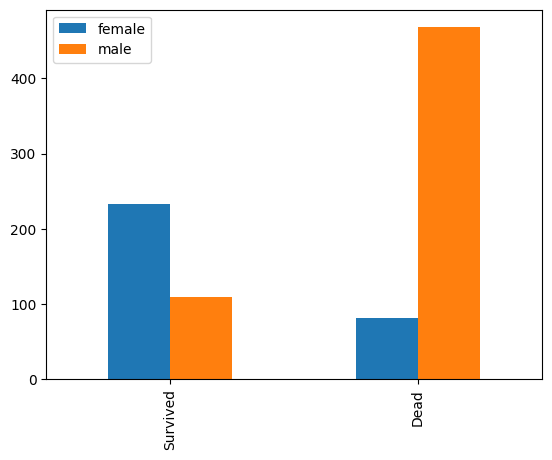

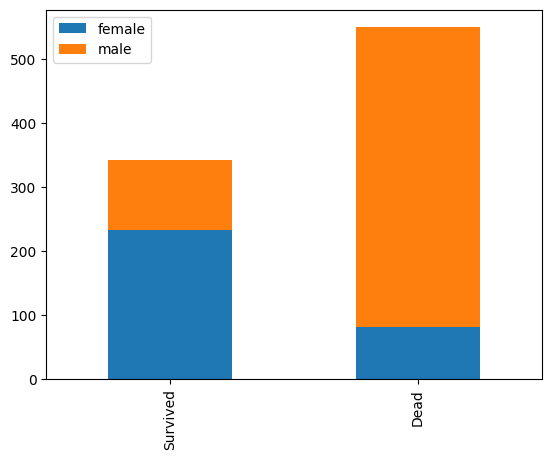

In [411]:
df.plot(kind='bar') # 막대
df.plot(kind='bar', stacked=True) # 누적 막대

<Axes: >

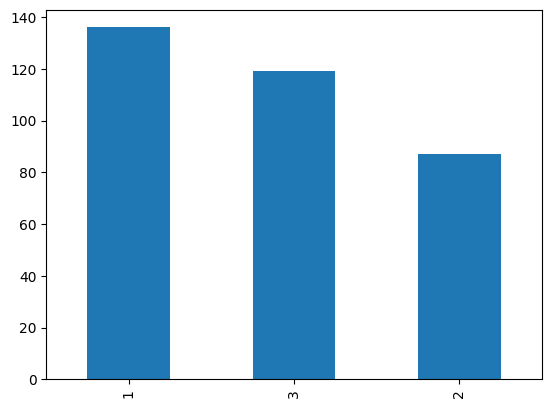

In [412]:
pclass = train[train['Survived'] == 1]['Pclass'].value_counts()
pclass.plot(kind='bar')

<Axes: >

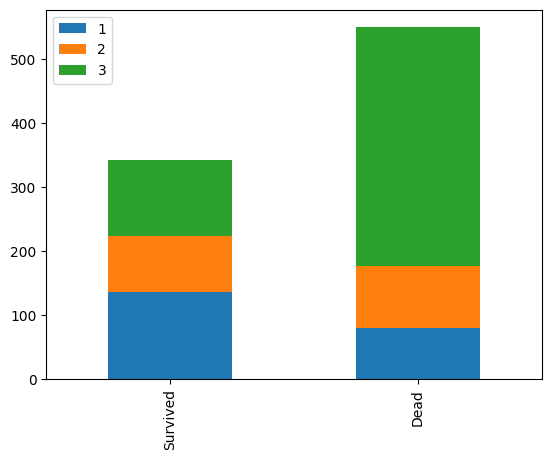

In [413]:
# 위 코드를 보지 않고 Pclass에 대하여 생사 비율을 bar차트를 이용하여 그리기
pclass1 = train[train['Pclass']==1]['Survived'].value_counts()
pclass2 = train[train['Pclass']==2]['Survived'].value_counts()
pclass3 = train[train['Pclass']==3]['Survived'].value_counts()
df2 = pd.DataFrame([pclass1, pclass2, pclass3])
df2.index = ['1','2','3']
df2 = df2.T
df2.index = ['Survived', 'Dead']
df2.plot(kind='bar', stacked=True)

<Axes: >

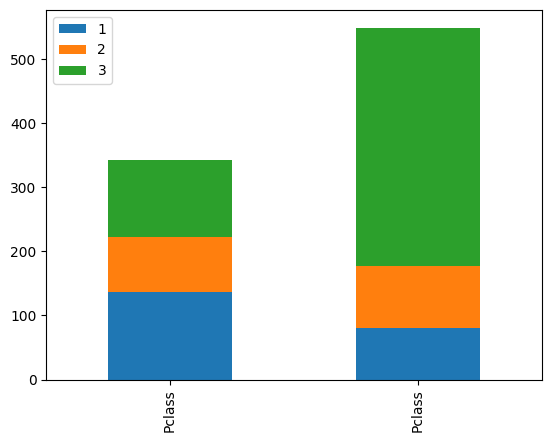

In [414]:
# 쉬운 코드
survived1 = train[train['Survived']==1]['Pclass'].value_counts().sort_index()
dead1 = train[train['Survived']==0]['Pclass'].value_counts().sort_index()

df1 = pd.DataFrame([survived1,dead1])
df1.plot(kind='bar', stacked=True)

In [415]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    # df.plot(kind='pie',subplots=True, figsize=(10,5))
    df.plot(kind='bar', stacked=True, figsize=(10,5))

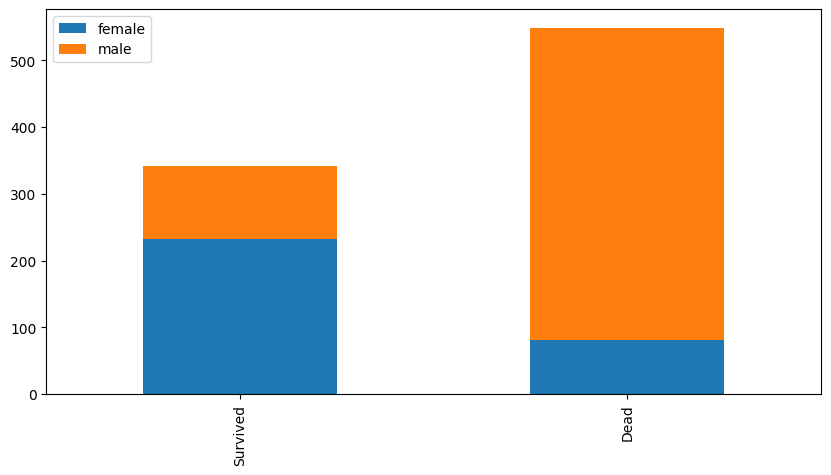

In [416]:
bar_chart('Sex')

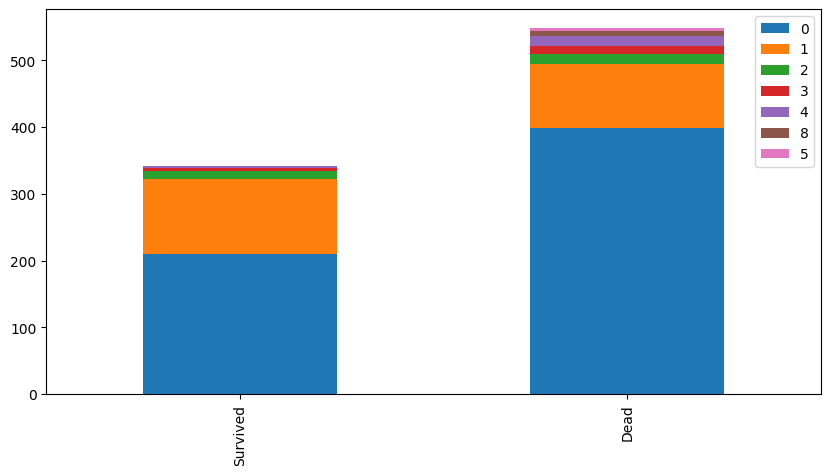

In [417]:
bar_chart('SibSp')

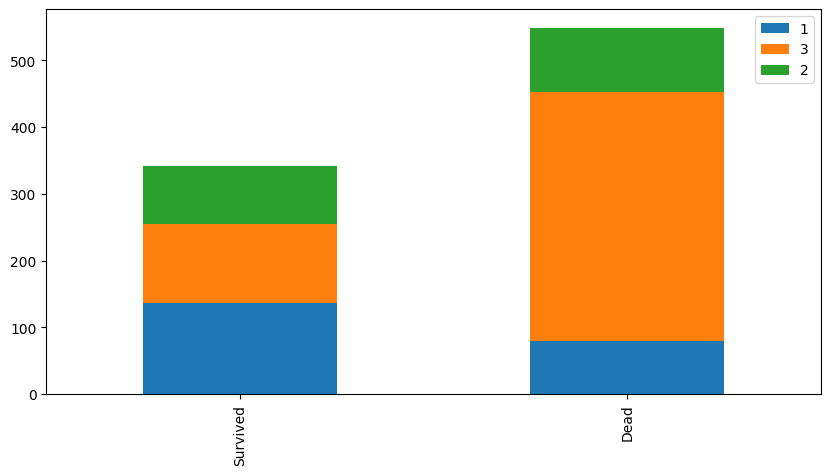

In [418]:
bar_chart('Pclass')
# 이 차트를 보면 pclass가 1인쪽이 더 생존율이 높다!
# 이런 것을 탐색적 데이터 분석이라고 함

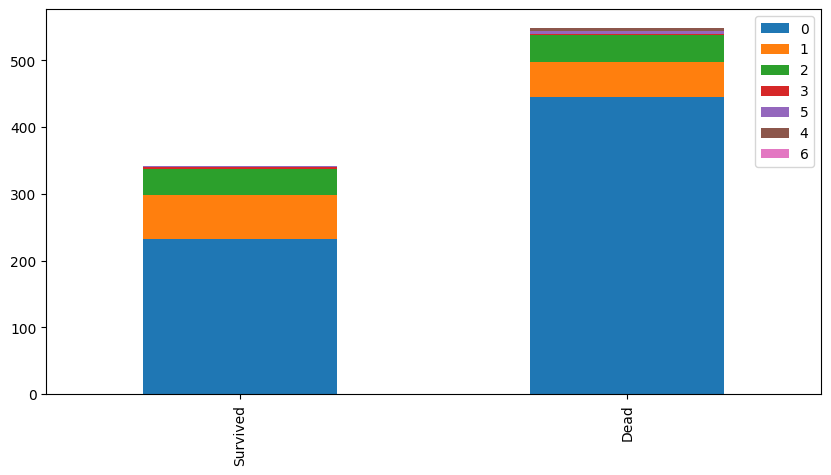

In [419]:
bar_chart('Parch')

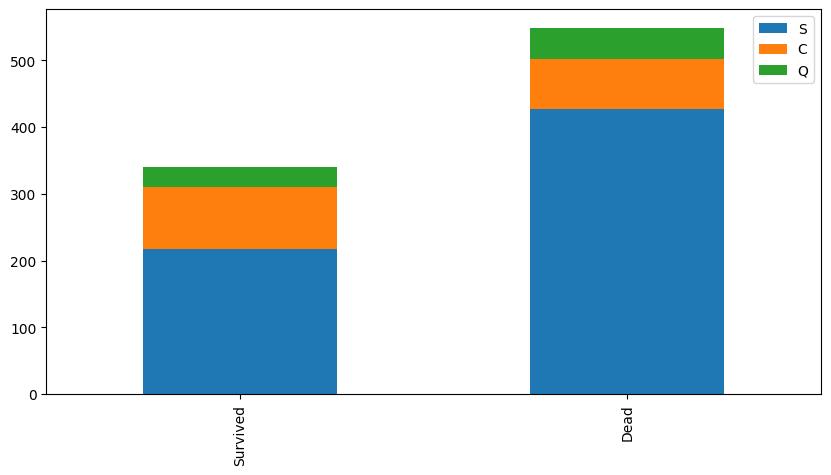

In [420]:
bar_chart('Embarked')
# 여기서 보면 C가 비율이 더 높음

<Axes: xlabel='Embarked'>

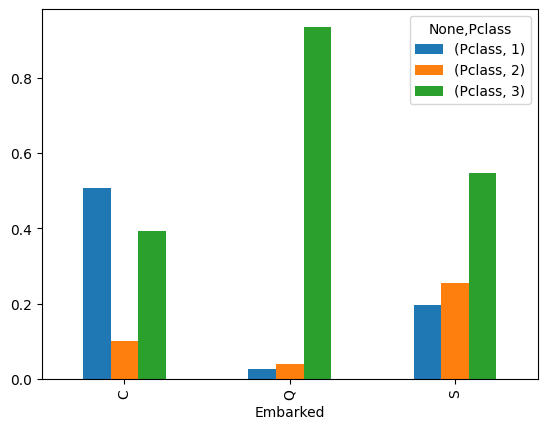

In [421]:
# 승선 항구별 1등실~3등실까지 비율을 조사하시오. 개어렵
res = pd.DataFrame(train.groupby('Embarked')['Pclass'].value_counts()/train.groupby('Embarked')['Pclass'].count())
res.unstack().plot(kind='bar')

<Axes: xlabel='Embarked'>

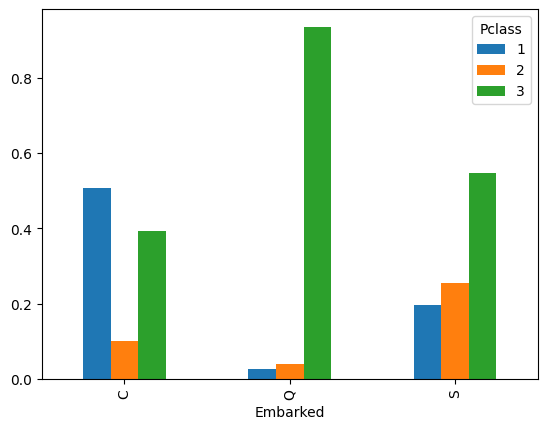

In [422]:
em=train.groupby("Embarked").Pclass.value_counts()/train.groupby("Embarked").Pclass.count()
em=em.unstack()
em.plot(kind='bar')

In [423]:
val_gr = train['Pclass'].value_counts()
val_gr / val_gr.sum()

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

<Axes: xlabel='Embarked'>

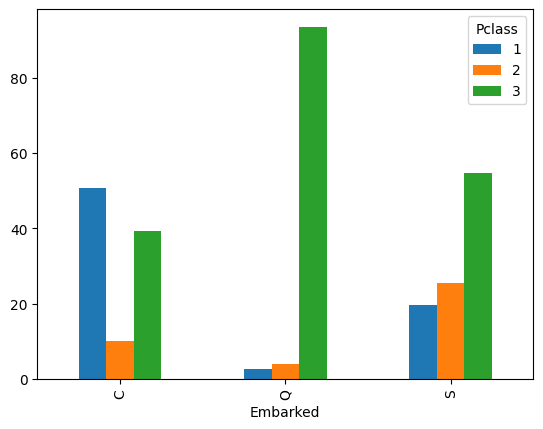

In [424]:
em = train.groupby(['Embarked', 'Pclass']).size().unstack().fillna(0)
em_ratio = em.div(em.sum(axis=1), axis=0) * 100
em_ratio.plot(kind='bar')

In [425]:
# 데이터 리터러시(literacy) = 데이터에 대한 이해
# 도시내의 교회의 개수와 범죄율 사이의 관계
# 강한 양의 상관관계
# 교회개수 -> 범죄율 = 인구가 많으면 범죄율이 높아짐 + 인구가 많으면 교회가 많아짐

In [426]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [427]:
test.head(1)
# knn -> k = 3

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


1. 현 상황에서 PassengerId가 필요할까? X
2. Pclass는? O
3. Name은? X 다만 호칭 원핫인코딩을 통해서 사용한다면 O(카테고리 타입이기 때문에 원핫인코딩이 필요)
4. Sex는? 수치로 변경하여 이용
5. Age는 O 다만 표준화를 할 필요가 있음

In [428]:
train_test_data = [train, test]
train_test_data[1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [429]:
'Kelly, Mr. James'

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.')
train.head() # title열이 추가됨

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [430]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [431]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [432]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
# 위처럼 하는 것에는 특별한 이유는 없음. 가장 많은 3가지 호칭 빼곤 퉁치자는 것임.

In [433]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [434]:
# 이제 Name열은 필요없음
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [435]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [436]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [437]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [438]:
# age열의 빈값을 타이틀로 그룹화하고 호칭별 중위수로 변환
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [439]:
# 나이의 범위 지정
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [440]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [441]:
# Embarked의 빈값을 어떻게 채울까?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [442]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [443]:
# embarked를 숫자로 변환
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [444]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [445]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [446]:
# test의 Fare의 결측값 출력하기
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,0,3.0,0,0,3701,NaN,NaN,0,0


In [447]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [448]:
# Pclass가 3이고 Embarked가 0인 승객의 Fare열의 중위수 값으로 결측값 메꾸기
test.loc[test['Fare'].isnull(), 'Fare'] = test[(test['Pclass'] == 3) & (test['Embarked'] == 0)]['Fare'].median()

In [449]:
test.loc[150:155]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
150,1042,1,1,1.0,0,1,11767,83.1583,C54,1,2
151,1043,3,0,2.0,0,0,349255,7.8958,NaN,1,0
152,1044,3,0,3.0,0,0,3701,8.0500,NaN,0,0
153,1045,3,1,2.0,0,2,350405,12.1833,NaN,0,2
154,1046,3,0,0.0,4,2,347077,31.3875,NaN,0,3
155,1047,3,0,1.0,0,0,S.O./P.P. 752,7.5500,NaN,0,0


In [450]:
# 만약 결측값이 많은 경우는?
# 예시로 Pclass별로 그룹화를 한 다음 각 그룹에 대한 Fare열 값의 중위수로 각각의 결측값을 대체
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)
# test의 결측값을 Pclass로 그룹화 후 Fare열에 대해서 중위수로 변환. 추가로 변수에 그대로 적용

# 강사님 설명. 일단 transform이 사용하기 어려운 함수임
# test 데이터프레임의 Pclass별 그룹화 -> 각 그룹의 Fare열 값으로 test.Fare열의 결측값을 대체

transform은 transform에 입력한 함수값으로 적용하여 하나의 시리즈를 만들며
위에서 사용한 방법은 시리즈를 빈값에 대체하도록 하는 코드가 적용된 것임

예시로 그림을 보자면
Pclass transform으로 생성된 임시 열
1       6
2       8
1       6
1       6
3       10
...
2       8
총 891개?의 데이터로 구성되고
위와 같은 방식으로 만들어지는 것임

In [451]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2


In [452]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [453]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [454]:
train.Cabin.value_counts() # 방 번호같다고 함
# 여기서 앞글자가 중요함. 앞이 A로 시작하는 경우는 좋은 방일 것임
# 그래서 버리긴 아까운 정보이지만 결측값이 너무 많음

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [455]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[0]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [456]:
train[train['Pclass']==1]['Cabin'].value_counts() # 많은 숫자가 앞쪽에 있음

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

In [457]:
train[train['Pclass']==2]['Cabin'].value_counts()

F    8
D    4
E    4
Name: Cabin, dtype: int64

In [458]:
train[train['Pclass']==3]['Cabin'].value_counts()

F    5
G    4
E    3
Name: Cabin, dtype: int64

In [459]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

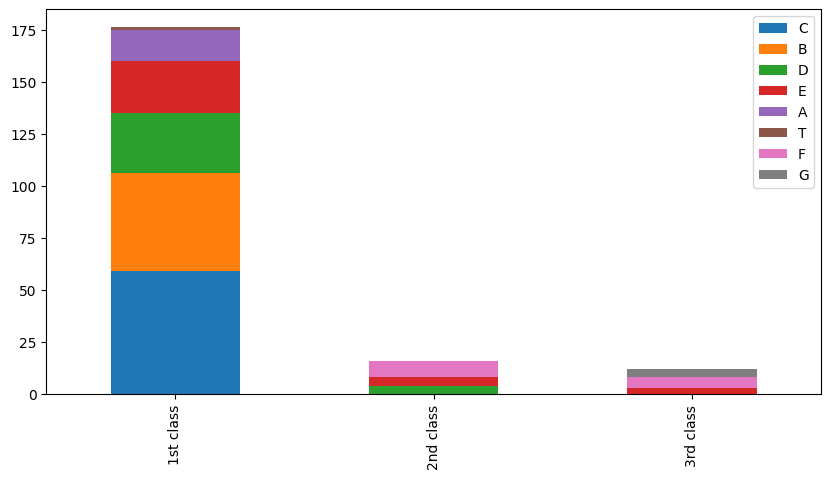

In [460]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [461]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [462]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [463]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1


In [464]:
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [465]:
test.FamilySize.value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: FamilySize, dtype: int64

In [466]:
# 원래는 이렇게 하지 않음;;
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [467]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [468]:
train = train.drop(['PassengerId'], axis=1)

In [469]:
# survived는 분리
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [470]:
print(train_data.shape)
print(target.shape)
train.head()

(891, 8)
(891,)


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [471]:
print(test.shape)
test.head()

(418, 9)


,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8


In [490]:
# KNN 모델 가져오기
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1) # k=13으로 시작함. 최적은 5

# 교차검증 진행
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # k-fold 교차검증 10회 진행

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy') # cross validation score
print(score)

[0.73333333 0.7752809  0.76404494 0.74157303 0.78651685 0.74157303
 0.75280899 0.76404494 0.73033708 0.68539326]


In [473]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for i in range(1,20,2):
    clf = KNeighborsClassifier(n_neighbors = i) # k=13
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # k-fold 교차검증 10회 진행

    score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy') # cross validation score
    # print(i, score)
    s = round( np.mean(score)*100, 2)
    if s > 82:
        print(i, s)

3 82.05
11 82.16
13 82.6


# 돌아가는 구조
891개의 데이터를 10개의 fold로 나눔 = 한개의 데이터당 89개의 데이터

첫번째 데이터 묶음을 타겟으로 적용한 뒤 타겟의 생존 데이터는 제외하고 데이터에서 가까운 값을 이용하여 가까운 값 13개중 가장 비율이 높은 데이터를 결과로 선정

위의 내용을 반복하면 교차검증임


In [474]:
round(np.mean(score)*100, 2) # 여기까지는 학습데이터의 결과를 확인한 것임

80.81

In [475]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8


In [476]:
test_data = test.drop("PassengerId", axis=1).copy()
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,0.0
1,3,1,3.0,0.0,2.0,0,2,0.4
2,2,0,3.0,0.0,2.0,2,0,0.0
3,3,0,2.0,0.0,2.0,0,0,0.0
4,3,1,1.0,0.0,2.0,0,2,0.8


In [491]:
clf.fit(train_data, target) # predict 이전에 해야됨

KNeighborsClassifier(n_neighbors=1)

In [492]:
prediction = clf.predict(test_data)
prediction

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [493]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })
submission.to_csv('submission_knn1.csv', index=False)
submission # 0.74880   이러면 직접 한 것보다 못한 점수 아닌가?
# k = 5   0.77033 내꺼보단 높음

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [480]:
# 원래 애초에 대부분의 모델에서 타이타닉에서 0.8을 넘기기 어려우며 0.9를 넘기는 것은 불가능함
# 실제로 0.83정도는 나올 수 있다고 하심
# 이제 0.79정도는 넘길 수 있도록 공부를 진행할 것임

In [481]:
# 가능하면 내일은 svm, decision tree
# 추후 naive bayes, ...
# 내일은 오전에 transform을 설명할 것
# 담주부터 딥러닝임
# 플젝기간엔 오전은 공부 오후는 플젝